In [ ]:
from tensorflow.keras.datasets import imdb
import numpy as np
import pandas as pd

In [ ]:
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=10000)

print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


(25000,) (25000,)
(25000,) (25000,)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
def Vectorize(docs, dim=10000):

    result_arr = np.zeros((len(docs), dim))

    for idx, doc in enumerate(docs):
        result_arr[idx, doc] = 1
    
    return result_arr

In [ ]:
train_input = Vectorize(train_input)
test_input = Vectorize(test_input)
train_target = np.asarray(train_target).astype('float32')
test_target = np.asarray(test_target).astype('float32')

print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(25000, 10000) (25000,)
(25000, 10000) (25000,)


# 1. Network 크기 축소

* model01: each layer has 16 nodes.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ReLU

model01 = Sequential()

model01.add(Dense(16, input_shape=(train_input.shape[1], )))
model01.add(ReLU())
model01.add(Dense(16))
model01.add(ReLU())
model01.add(Dense(1, activation='sigmoid'))

model01.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)

* model02: each layer has 6 nodes.

In [ ]:
model02 = Sequential()

model02.add(Dense(6, input_shape=(train_input.shape[1], )))
model02.add(ReLU())
model02.add(Dense(6))
model02.add(ReLU())
model02.add(Dense(1, activation='sigmoid'))

model02.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)

* fit model01

In [ ]:
history01 = model01.fit(
    train_input,
    train_target,
    epochs=20,
    batch_size=512,
    validation_data=(test_input, test_target)
)

Epoch 1/20
49/49 [==============================] - 5s 34ms/step - loss: 0.4672 - acc: 0.8245 - val_loss: 0.3568 - val_acc: 0.8722
Epoch 2/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2696 - acc: 0.9061 - val_loss: 0.3020 - val_acc: 0.8805
Epoch 3/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2055 - acc: 0.9274 - val_loss: 0.3111 - val_acc: 0.8742
Epoch 4/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1716 - acc: 0.9388 - val_loss: 0.2952 - val_acc: 0.8831
Epoch 5/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1487 - acc: 0.9473 - val_loss: 0.3073 - val_acc: 0.8805
Epoch 6/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1274 - acc: 0.9554 - val_loss: 0.3391 - val_acc: 0.8743
Epoch 7/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1112 - acc: 0.9622 - val_loss: 0.3544 - val_acc: 0.8730
Epoch 8/20
49/49 [==============================] - 1s 22ms/step - loss: 0.0962 - a

* fit model02

In [ ]:
history02 = model02.fit(
    train_input,
    train_target,
    epochs=20,
    batch_size=512,
    validation_data=(test_input, test_target)
)

Epoch 1/20
49/49 [==============================] - 2s 33ms/step - loss: 0.5124 - acc: 0.8043 - val_loss: 0.3989 - val_acc: 0.8676
Epoch 2/20
49/49 [==============================] - 1s 22ms/step - loss: 0.3157 - acc: 0.8970 - val_loss: 0.3148 - val_acc: 0.8838
Epoch 3/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2386 - acc: 0.9201 - val_loss: 0.2860 - val_acc: 0.8888
Epoch 4/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1964 - acc: 0.9327 - val_loss: 0.2904 - val_acc: 0.8824
Epoch 5/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1698 - acc: 0.9415 - val_loss: 0.2850 - val_acc: 0.8865
Epoch 6/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1506 - acc: 0.9485 - val_loss: 0.2991 - val_acc: 0.8820
Epoch 7/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1351 - acc: 0.9542 - val_loss: 0.3106 - val_acc: 0.8800
Epoch 8/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1234 - a

* model01 & model02 Visualization

In [ ]:
epoch_list = range(1, 21, 1)
loss_train01 = history01.history['loss']
loss_train02 = history02.history['loss']
loss_val01 = history01.history['val_loss']
loss_val02 = history02.history['val_loss']

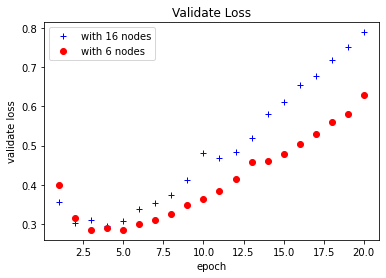

''

In [ ]:
import matplotlib.pyplot as plt

plt.plot(epoch_list, loss_val01, 'b+', label='with 16 nodes')
plt.plot(epoch_list, loss_val02, 'ro', label='with 6 nodes')

plt.title('Validate Loss')
plt.xlabel('epoch')
plt.ylabel('validate loss')
plt.legend()

plt.show()
;

**Conclusion**: 16 nodes를 가진 model이 훨씬 learning이 빠르게 되지만, overfitting도 훨씬 빠르게 됨을 알 수 있다!

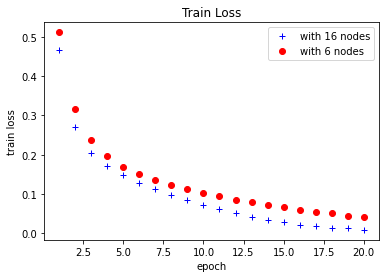

''

In [ ]:
plt.plot(epoch_list, loss_train01, 'b+', label='with 16 nodes')
plt.plot(epoch_list, loss_train02, 'ro', label='with 6 nodes')

plt.title('Train Loss')
plt.xlabel('epoch')
plt.ylabel('train loss')
plt.legend()

plt.show()
;

**Conclusion**: 16 nodes를 가진 model이 훨씬 train set에 대한 learning이 빠르게 되는군..

**Conclusion**: 6 nodes를 가진 model이 loss val이 조금 더 낮은 편이므로, model01을 택하도록 한다! 땅땅!

# 2. Weight Regularization 추가

* model01_L2: each layer has 6 nodes. (with L2 Regularization)

In [ ]:
from tensorflow.keras.regularizers import l1, l2, l1_l2

model01_l2 = Sequential()
model01_l2.add(Dense(6, kernel_regularizer=l2(0.001), input_shape=(train_input.shape[1], )))
model01_l2.add(ReLU())
model01_l2.add(Dense(6, kernel_regularizer=l2(0.001)))
model01_l2.add(ReLU())
model01_l2.add(Dense(1, activation='sigmoid'))

model01_l2.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)

* fit model01_L2

In [ ]:
history01_l2 = model01_l2.fit(
    train_input,
    train_target,
    epochs=20,
    batch_size=512,
    validation_data=(test_input, test_target)
)

Epoch 1/20
49/49 [==============================] - 2s 32ms/step - loss: 0.5436 - acc: 0.8130 - val_loss: 0.4492 - val_acc: 0.8597
Epoch 2/20
49/49 [==============================] - 1s 22ms/step - loss: 0.3730 - acc: 0.8924 - val_loss: 0.3629 - val_acc: 0.8842
Epoch 3/20
49/49 [==============================] - 1s 22ms/step - loss: 0.3051 - acc: 0.9095 - val_loss: 0.3363 - val_acc: 0.8852
Epoch 4/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2745 - acc: 0.9178 - val_loss: 0.3241 - val_acc: 0.8886
Epoch 5/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2542 - acc: 0.9252 - val_loss: 0.3225 - val_acc: 0.8891
Epoch 6/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2404 - acc: 0.9306 - val_loss: 0.3272 - val_acc: 0.8871
Epoch 7/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2304 - acc: 0.9358 - val_loss: 0.3419 - val_acc: 0.8800
Epoch 8/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2239 - a

* model01_L2 Visualization

In [ ]:
epoch_list = range(1, 21, 1)
loss_train01l2 = history01_l2.history['loss']
loss_val01l2 = history01_l2.history['val_loss']

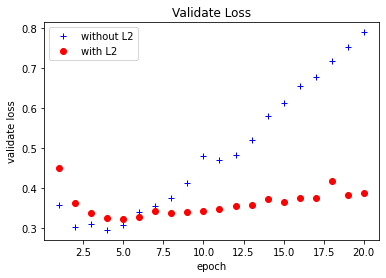

''

In [ ]:
plt.plot(epoch_list, loss_val01, 'b+', label='without L2')
plt.plot(epoch_list, loss_val01l2, 'ro', label='with L2')

plt.title('Validate Loss')
plt.xlabel('epoch')
plt.ylabel('validate loss')
plt.legend()

plt.show()
;

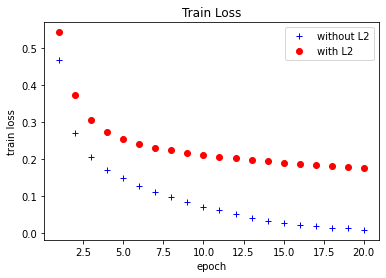

''

In [ ]:
plt.plot(epoch_list, loss_train01, 'b+', label='without L2')
plt.plot(epoch_list, loss_train01l2, 'ro', label='with L2')

plt.title('Train Loss')
plt.xlabel('epoch')
plt.ylabel('train loss')
plt.legend()

plt.show()
;

* **Conclusion**: L2 Regularization을 가진 model이 훨씬 Overfitting이 안되지만,
* Weight 자체가 train set에서 제대로 반영이 안되다보니, loss 자체가 전반적으로 높은 편이군!
* 따라서, L2 Regularization을 사용하지 않은 채로, 기존의 model01를 사용하도록 한다.

* **참고**
* L1 Regularization
    * regularizers.l1(0.001)
* L1 & L2 Regularization
    * regularizers.l1_l2(l1=0.001, l2=0.001)

# 3. Dropout 추가

In [ ]:
from tensorflow.keras.layers import Dropout

model01_do = Sequential()
model01_do.add(Dense(6, input_shape=(train_input.shape[1], )))
model01_do.add(ReLU())
model01_do.add(Dropout(0.5))

model01_do.add(Dense(6))
model01_do.add(ReLU())
model01_do.add(Dropout(0.5))

model01_do.add(Dense(1, activation='sigmoid'))

model01_do.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)

In [ ]:
history01_do = model01_do.fit(
    train_input,
    train_target,
    epochs=20,
    batch_size=512,
    validation_data=(test_input, test_target)
)

Epoch 1/20
49/49 [==============================] - 2s 30ms/step - loss: 0.6754 - acc: 0.5604 - val_loss: 0.6466 - val_acc: 0.8132
Epoch 2/20
49/49 [==============================] - 1s 26ms/step - loss: 0.6270 - acc: 0.6306 - val_loss: 0.5841 - val_acc: 0.8534
Epoch 3/20
49/49 [==============================] - 1s 23ms/step - loss: 0.5813 - acc: 0.6696 - val_loss: 0.5271 - val_acc: 0.8731
Epoch 4/20
49/49 [==============================] - 1s 23ms/step - loss: 0.5451 - acc: 0.6924 - val_loss: 0.4723 - val_acc: 0.8793
Epoch 5/20
49/49 [==============================] - 1s 23ms/step - loss: 0.5123 - acc: 0.7240 - val_loss: 0.4240 - val_acc: 0.8847
Epoch 6/20
49/49 [==============================] - 1s 23ms/step - loss: 0.4933 - acc: 0.7457 - val_loss: 0.3928 - val_acc: 0.8874
Epoch 7/20
49/49 [==============================] - 1s 23ms/step - loss: 0.4730 - acc: 0.7579 - val_loss: 0.3582 - val_acc: 0.8894
Epoch 8/20
49/49 [==============================] - 1s 23ms/step - loss: 0.4557 - a

* model02_dropout Visualization

In [ ]:
epoch_list = range(1, 21, 1)
loss_train01do = history01_do.history['loss']
loss_val01do = history01_do.history['val_loss']

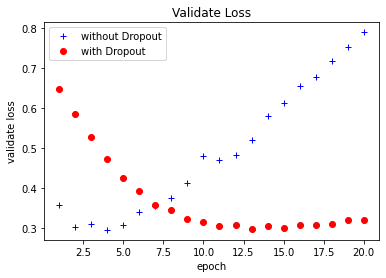

''

In [ ]:
plt.plot(epoch_list, loss_val01, 'b+', label='without Dropout')
plt.plot(epoch_list, loss_val01do, 'ro', label='with Dropout')

plt.title('Validate Loss')
plt.xlabel('epoch')
plt.ylabel('validate loss')
plt.legend()

plt.show()
;

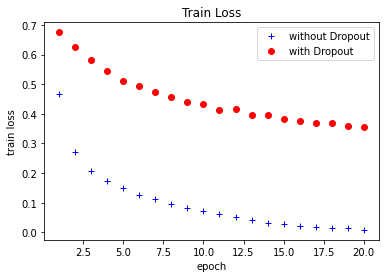

''

In [ ]:
plt.plot(epoch_list, loss_train01, 'b+', label='without Dropout')
plt.plot(epoch_list, loss_train01do, 'ro', label='with Dropout')

plt.title('Train Loss')
plt.xlabel('epoch')
plt.ylabel('train loss')
plt.legend()

plt.show()
;

* **Conclusion**: dropout을 가진 model이 여기에서는 사실 별 효과가 없네.... 아쉽군...